In [1]:
import numpy as np
import numpy.random as npr
import sklearn
import sklearn.linear_model
import matplotlib.pyplot as plt
%matplotlib inline

### Robust regression with huber smooth approximation

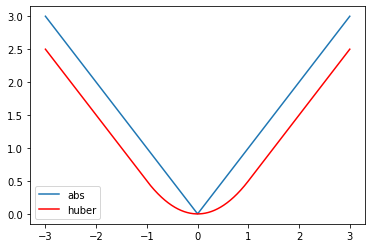

In [2]:
huber = lambda z: 0.5*z**2*(np.abs(z)<=1) + (np.abs(z)-0.5)*(np.abs(z)>1)

grid = np.linspace(-3,3,1000)
plt.plot(grid, np.abs(grid), label="abs")
plt.plot(grid, huber(grid), 'r', label="huber")
plt.legend()
plt.show()

In [4]:
#generate outlier data
def gen_outlier_data(n=40,Noutliers=3):
    # generate random data
    x = np.random.randn(n)
    y = 10*x
    # add random outliers
    y[:Noutliers] = -100*(x[:Noutliers]+np.random.randn(Noutliers))

    X = x[:,None] # reshape for sklearn

    return X,y

w = 9.988306
b = -0.028278


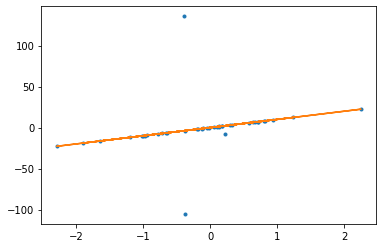

In [5]:
#use huber loss function and minimize it using gradient descent #robust to outlier
X,y = gen_outlier_data()
x=X.flatten()

w = 0
β = 0
α = 0.01

Nsteps = 1000
yhat = lambda x,w,b: w*x+b

huber_deriv = lambda z: z*(np.abs(z)<=1) + np.sign(z)*(np.abs(z)>1)

for t in range(Nsteps):
    dLdw = -np.sum(x*huber_deriv(y-yhat(x,w,β)))
    dLdβ = -np.sum(huber_deriv(y-yhat(x,w,β)))
    w -= α*dLdw
    β -= α*dLdβ
    
print("w = %f" % w)
print("b = %f" % β)

plt.plot(x,y,'.')
plt.plot(x,w*x+β);

### log-sum-exp concept

In [9]:
nums = np.array([1,5,20,-40])
np.log(np.sum(np.exp(nums))) #almost indentcial to choose the highest element in array
                             #a smooth approxmiation for max([residulas])

20.00000031150507